# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | roma
Processing Record 2 of Set 1 | castillos
Processing Record 3 of Set 1 | dahlonega
Processing Record 4 of Set 1 | harper
Processing Record 5 of Set 1 | la passe
Processing Record 6 of Set 1 | dickinson
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | port macquarie
Processing Record 11 of Set 1 | aasiaat
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | ayorou
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | fort bragg
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | malanje
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | kawthoung
City not found. Skipping...
Processing Record 20 of Set 1 | chonchi
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,roma,43.2128,-75.4557,33.37,97,100,5.75,US,1738644755
1,castillos,-34.1667,-53.8333,72.01,91,3,7.94,UY,1738644756
2,dahlonega,34.5326,-83.9849,49.93,82,0,3.74,US,1738644481
3,harper,4.3750,-7.7169,77.18,87,95,2.48,LR,1738644758
4,la passe,45.5549,-0.8967,40.30,77,0,4.81,FR,1738644760


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,roma,43.2128,-75.4557,33.37,97,100,5.75,US,1738644755
1,castillos,-34.1667,-53.8333,72.01,91,3,7.94,UY,1738644756
2,dahlonega,34.5326,-83.9849,49.93,82,0,3.74,US,1738644481
3,harper,4.3750,-7.7169,77.18,87,95,2.48,LR,1738644758
4,la passe,45.5549,-0.8967,40.30,77,0,4.81,FR,1738644760


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

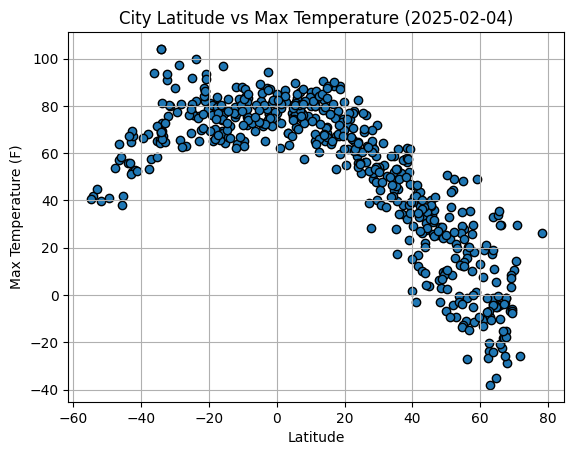

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

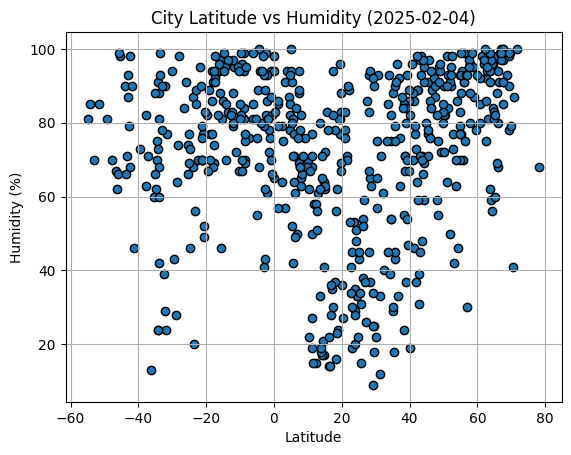

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

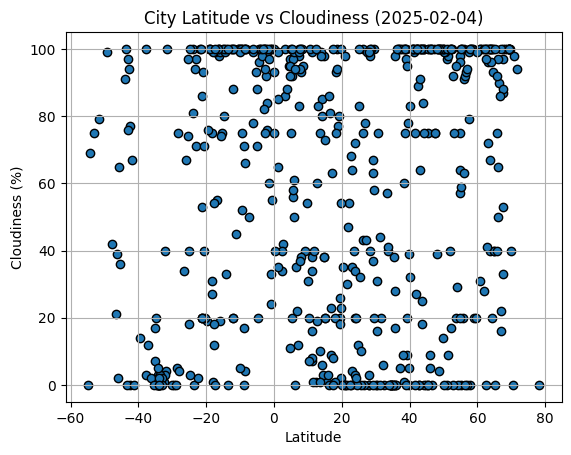

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

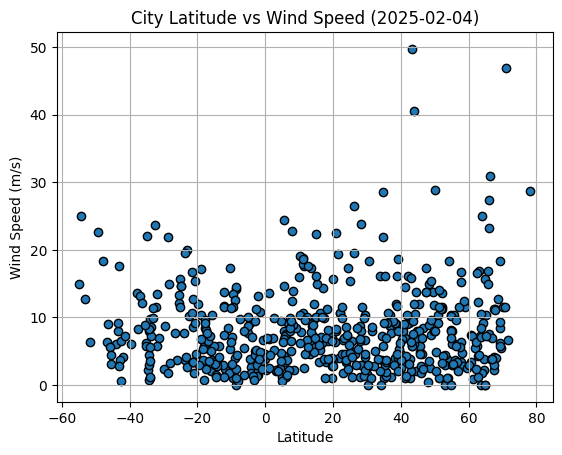

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linregress_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r^2-value is:{rvalue**2}")
    plt.scatter(x_values, y_values, edgecolors = "black", linewidth=0.5)
    plt.plot(x_values, regress_values, "r")
    plt.annotate(line_eq,(x_values.min(), y_values.min()), fontsize=13)
    plt.tight_layout()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,roma,43.2128,-75.4557,33.37,97,100,5.75,US,1738644755
2,dahlonega,34.5326,-83.9849,49.93,82,0,3.74,US,1738644481
3,harper,4.3750,-7.7169,77.18,87,95,2.48,LR,1738644758
4,la passe,45.5549,-0.8967,40.30,77,0,4.81,FR,1738644760
5,dickinson,29.4608,-95.0513,72.05,90,100,10.36,US,1738644761


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,castillos,-34.1667,-53.8333,72.01,91,3,7.94,UY,1738644756
6,port-aux-francais,-49.3500,70.2167,40.87,81,99,22.57,TF,1738644762
8,grytviken,-54.2811,-36.5092,42.08,85,69,25.05,GS,1738644764
9,port macquarie,-31.4333,152.9167,80.08,77,100,7.00,AU,1738644765
13,puerto ayora,-0.7393,-90.3518,75.54,94,33,4.25,EC,1738644769


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is:0.8047211869456711


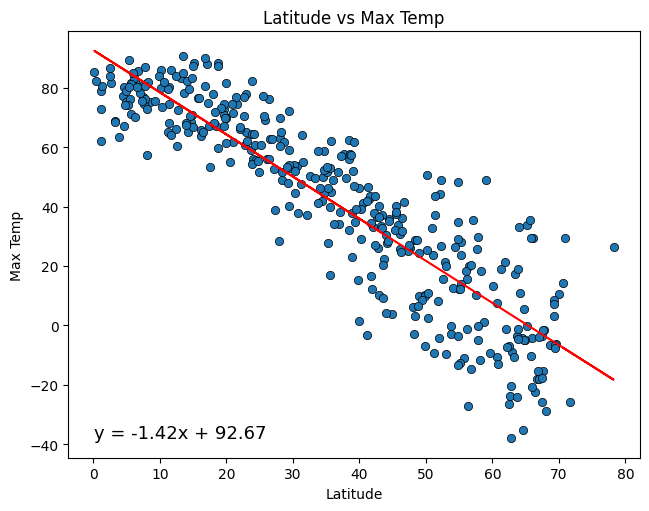

In [18]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.show()

The r^2-value is:0.25331009565734186


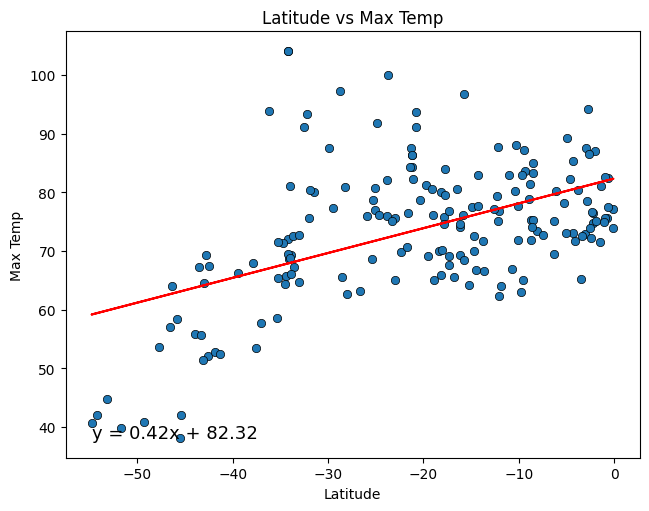

In [19]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.show()

**Discussion about the linear relationship:** Looking at both the northern and southern hemispheres, the closer you are to the equator, the warmer the temperatures are going to be. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is:0.17337594662365827


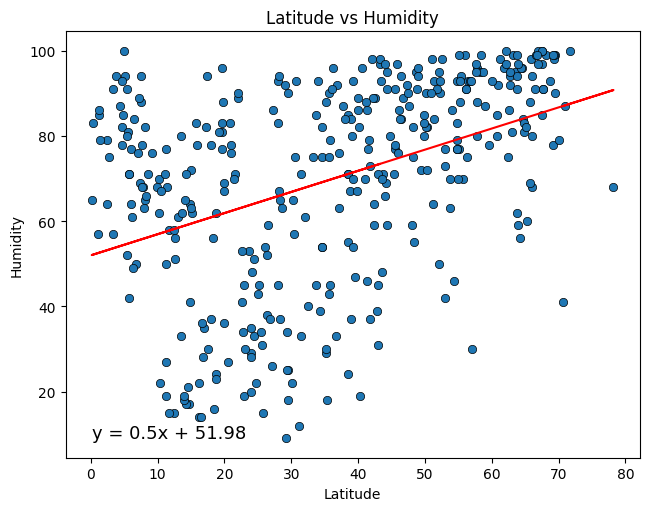

In [20]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

The r^2-value is:0.04908058148849911


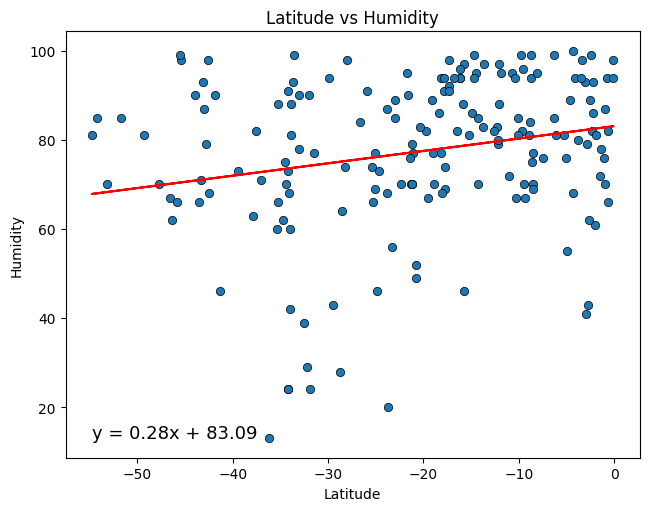

In [21]:
#Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

**Discussion about the linear relationship:** According to r squared values for both hemispheres, it is pretty low. So this means that humidity does not play a large role in regards to how close we are to the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is:0.0337757699445707


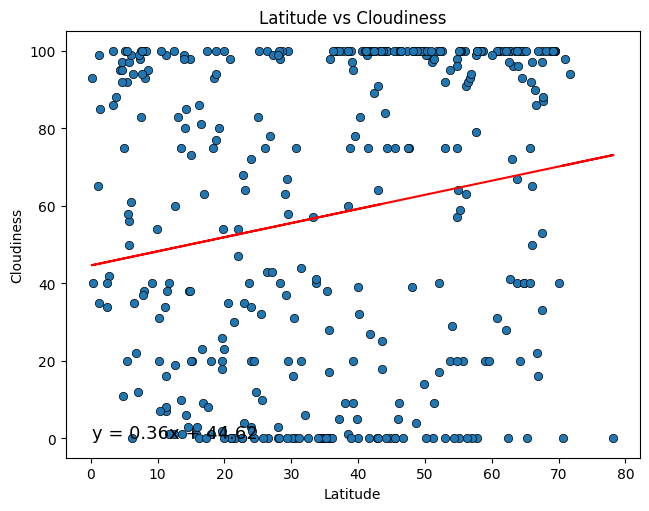

In [22]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

The r^2-value is:0.19936344916521703


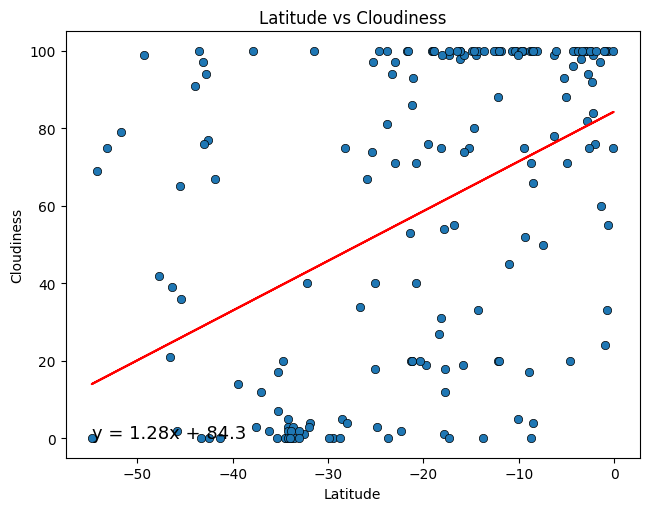

In [23]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

**Discussion about the linear relationship:** Similar to humidity, cloudiness does not seem to vary depending on how close we are to the equator. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is:0.004033330572521418


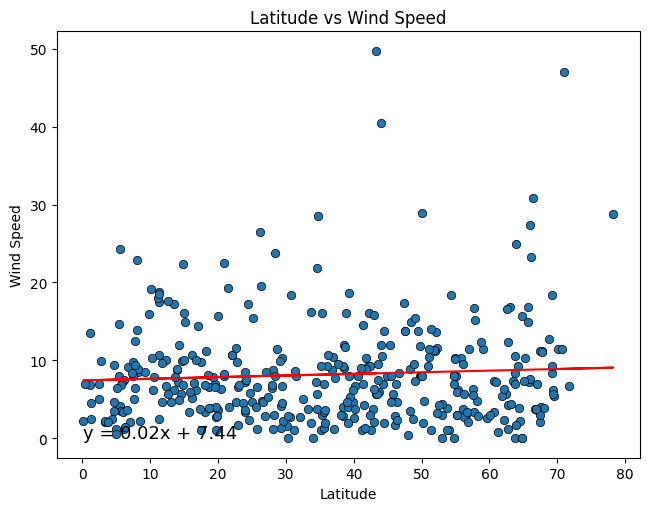

In [24]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

In [1]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

NameError: name 'linregress_plot' is not defined

**Discussion about the linear relationship:** Wind speed does not seem to vary depending on how close we are to the equator no matter the hemisphere. The r squared values for both are pretty low. 